In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

df_full = pd.read_csv('IMDB Dataset.csv')
# Results table
results = pd.DataFrame(columns=['Sample_Size', 'Max_Features', 'Accuracy', 'Notes'])


In [3]:
# Function to train and evaluate
def run_experiment(sample_size, max_features):
    df = df_full.sample(n=sample_size, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    accuracy = model.score(X_test_tfidf, y_test)
    return accuracy

# Experiments (safe for 8GB RAM)
experiments = [
    {'sample_size': 2000, 'max_features': 1000, 'notes': 'Small data, small vocab'},
    {'sample_size': 2000, 'max_features': 3000, 'notes': 'Small data, medium vocab'},
    {'sample_size': 2000, 'max_features': 5000, 'notes': 'Small data, larger vocab'},
    {'sample_size': 4000, 'max_features': 1000, 'notes': 'More data, small vocab'},
    {'sample_size': 4000, 'max_features': 3000, 'notes': 'More data, medium vocab'},
    {'sample_size': 4000, 'max_features': 5000, 'notes': 'More data, larger vocab'},
    {'sample_size': 6000, 'max_features': 6000, 'notes': 'More data, larger vocab'}
]

# Run and log
for exp in experiments:
    accuracy = run_experiment(exp['sample_size'], exp['max_features'])
    results.loc[len(results)] = [exp['sample_size'], exp['max_features'], accuracy, exp['notes']]
    print(f"Sample: {exp['sample_size']}, Max_Features: {exp['max_features']}, Accuracy: {accuracy:.2f}")

# Save results
results.to_csv('new_experiments.csv', index=False)
print(results)

Sample: 2000, Max_Features: 1000, Accuracy: 0.83
Sample: 2000, Max_Features: 3000, Accuracy: 0.83
Sample: 2000, Max_Features: 5000, Accuracy: 0.83
Sample: 4000, Max_Features: 1000, Accuracy: 0.86
Sample: 4000, Max_Features: 3000, Accuracy: 0.86
Sample: 4000, Max_Features: 5000, Accuracy: 0.87
Sample: 6000, Max_Features: 6000, Accuracy: 0.85
   Sample_Size  Max_Features  Accuracy                     Notes
0         2000          1000    0.8300   Small data, small vocab
1         2000          3000    0.8350  Small data, medium vocab
2         2000          5000    0.8350  Small data, larger vocab
3         4000          1000    0.8650    More data, small vocab
4         4000          3000    0.8650   More data, medium vocab
5         4000          5000    0.8700   More data, larger vocab
6         6000          6000    0.8475   More data, larger vocab


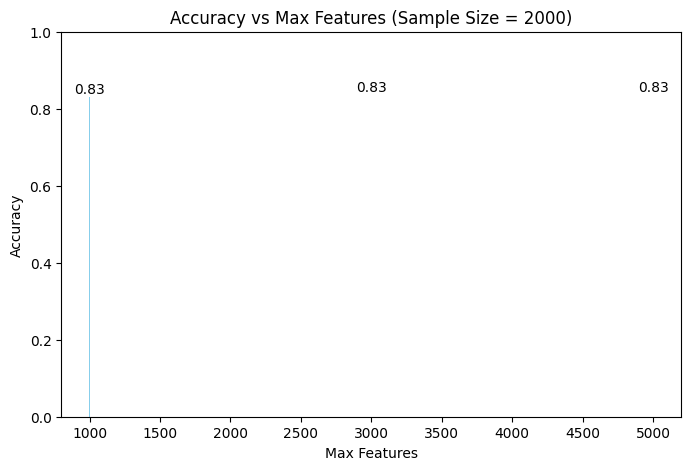

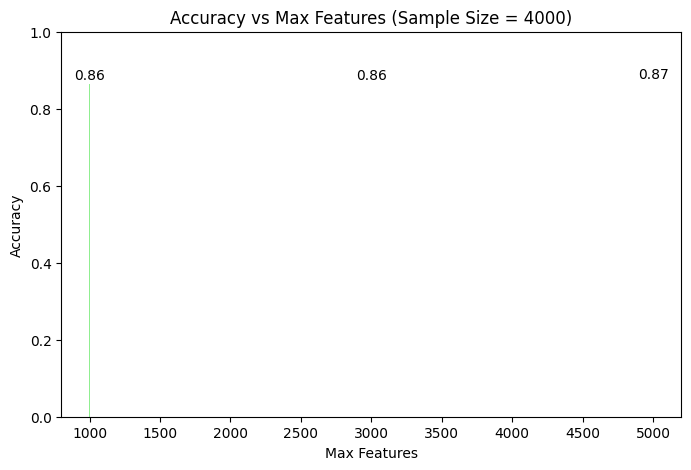

In [4]:
# Plot 1: Accuracy vs Max_Features for Sample_Size=2000
sample_2000 = results[results['Sample_Size'] == 2000]
plt.figure(figsize=(8, 5))
plt.bar(sample_2000['Max_Features'], sample_2000['Accuracy'], color='skyblue')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Features (Sample Size = 2000)')
plt.ylim(0, 1)
for i, v in enumerate(sample_2000['Accuracy']):
    plt.text(sample_2000['Max_Features'].iloc[i], v + 0.01, f"{v:.2f}", ha='center')
plt.savefig('accuracy_vs_max_features_2000.png')
plt.show()

# Plot 2: Accuracy vs Max_Features for Sample_Size=4000
sample_4000 = results[results['Sample_Size'] == 4000]
plt.figure(figsize=(8, 5))
plt.bar(sample_4000['Max_Features'], sample_4000['Accuracy'], color='lightgreen')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Features (Sample Size = 4000)')
plt.ylim(0, 1)
for i, v in enumerate(sample_4000['Accuracy']):
    plt.text(sample_4000['Max_Features'].iloc[i], v + 0.01, f"{v:.2f}", ha='center')
plt.savefig('accuracy_vs_max_features_4000.png')
plt.show()

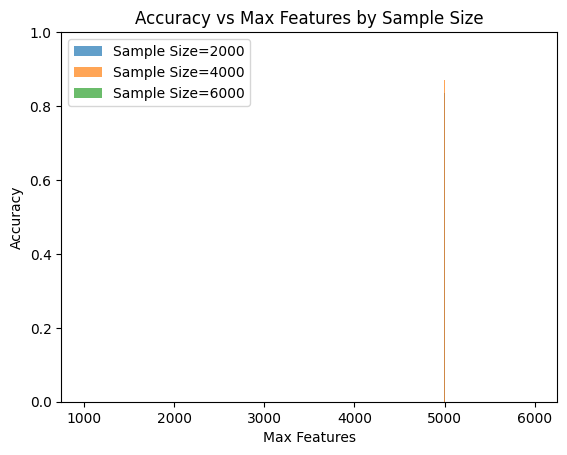

In [5]:
# Plot Accuracy vs Max_Features by Sample Size
for size in [2000, 4000, 6000]:
    subset = results[results['Sample_Size'] == size]
    plt.bar(subset['Max_Features'], subset['Accuracy'], label=f'Sample Size={size}', alpha=0.7)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Features by Sample Size')
plt.ylim(0, 1)
plt.legend()
plt.show()

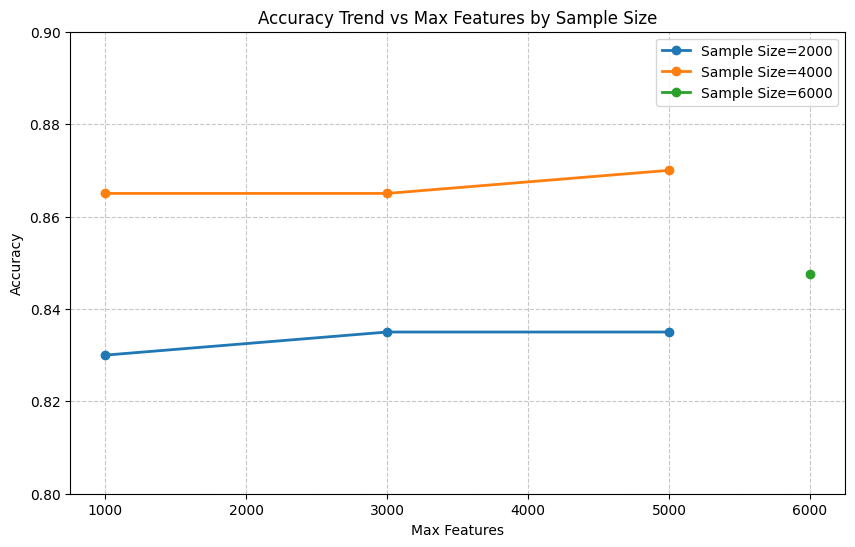

In [6]:
import matplotlib.pyplot as plt

# Load results (if not already in memory)
results = pd.read_csv('new_experiments.csv')

# Plot line graph: Accuracy vs Max_Features for each Sample_Size
plt.figure(figsize=(10, 6))  # Bigger for clarity

# Plot each sample size as a separate line
for size in [2000, 4000, 6000]:
    subset = results[results['Sample_Size'] == size]
    plt.plot(subset['Max_Features'], subset['Accuracy'], marker='o', label=f'Sample Size={size}', linewidth=2)

# Customize like a forex trend line
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend vs Max Features by Sample Size')
plt.ylim(0.8, 0.9)  # Zoom into your accuracy range
plt.grid(True, linestyle='--', alpha=0.7)  # Grid like forex charts
plt.legend()  # Show which line is which
plt.savefig('accuracy_trend_line.png')  # Save it
plt.show()

In [7]:
# New experiment: 4000 samples, 6000 features
df = df_full.sample(n=4000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=6000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
accuracy = model.score(X_test_tfidf, y_test)
print(f"Sample: 4000, Max_Features: 6000, Accuracy: {accuracy:.2f}")

# Add to results
results.loc[len(results)] = [4000, 6000, accuracy, 'More data, even larger vocab']
print(results)

Sample: 4000, Max_Features: 6000, Accuracy: 0.87
   Sample_Size  Max_Features  Accuracy                         Notes
0         2000          1000   0.83000       Small data, small vocab
1         2000          3000   0.83500      Small data, medium vocab
2         2000          5000   0.83500      Small data, larger vocab
3         4000          1000   0.86500        More data, small vocab
4         4000          3000   0.86500       More data, medium vocab
5         4000          5000   0.87000       More data, larger vocab
6         6000          6000   0.84750       More data, larger vocab
7         4000          6000   0.86875  More data, even larger vocab


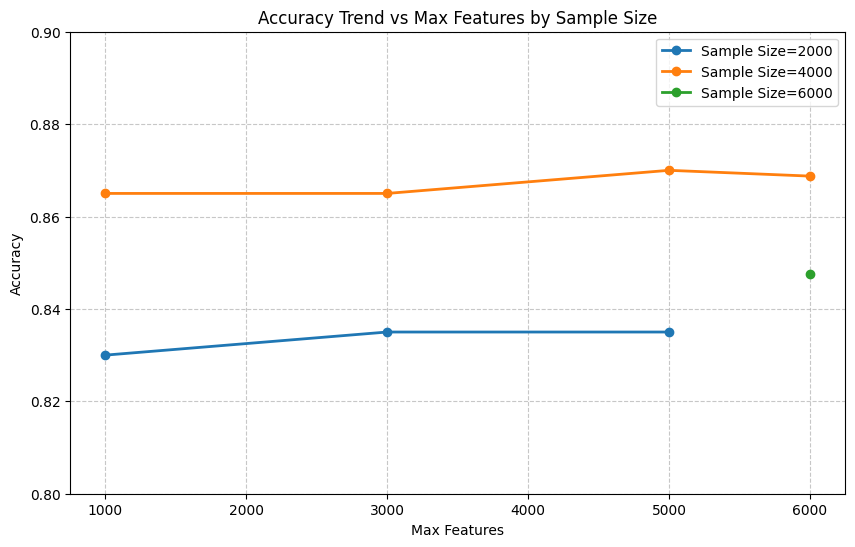

In [8]:
plt.figure(figsize=(10, 6))
for size in [2000, 4000, 6000]:
    subset = results[results['Sample_Size'] == size]
    plt.plot(subset['Max_Features'], subset['Accuracy'], marker='o', label=f'Sample Size={size}', linewidth=2)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend vs Max Features by Sample Size')
plt.ylim(0.8, 0.9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [9]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load dataset
df_full = pd.read_csv('IMDB Dataset.csv')
results = pd.DataFrame(columns=['Sample_Size', 'Max_Features', 'Accuracy', 'Notes'])

# Function to train, evaluate, and save
def run_experiment(sample_size, max_features, index):
    df = df_full.sample(n=sample_size, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    accuracy = model.score(X_test_tfidf, y_test)
    
    # Save model and vectorizer
    joblib.dump(model, f'model_s{sample_size}_f{max_features}.pkl')
    joblib.dump(vectorizer, f'vectorizer_s{sample_size}_f{max_features}.pkl')
    
    return accuracy

# Your 7 experiments
experiments = [
    {'sample_size': 2000, 'max_features': 1000, 'notes': 'Small data, small vocab'},
    {'sample_size': 2000, 'max_features': 3000, 'notes': 'Small data, medium vocab'},
    {'sample_size': 2000, 'max_features': 5000, 'notes': 'Small data, larger vocab'},
    {'sample_size': 4000, 'max_features': 1000, 'notes': 'More data, small vocab'},
    {'sample_size': 4000, 'max_features': 3000, 'notes': 'More data, medium vocab'},
    {'sample_size': 4000, 'max_features': 5000, 'notes': 'More data, larger vocab'},
    {'sample_size': 4000, 'max_features': 6000, 'notes': 'More data, even larger vocab'}
]

# Run and save
for i, exp in enumerate(experiments):
    accuracy = run_experiment(exp['sample_size'], exp['max_features'], i)
    results.loc[i] = [exp['sample_size'], exp['max_features'], accuracy, exp['notes']]
    print(f"Sample: {exp['sample_size']}, Max_Features: {exp['max_features']}, Accuracy: {accuracy:.2f}")

# Save results table
results.to_csv('new_experiments.csv', index=False)
print(results)

Sample: 2000, Max_Features: 1000, Accuracy: 0.83
Sample: 2000, Max_Features: 3000, Accuracy: 0.83
Sample: 2000, Max_Features: 5000, Accuracy: 0.83
Sample: 4000, Max_Features: 1000, Accuracy: 0.86
Sample: 4000, Max_Features: 3000, Accuracy: 0.86
Sample: 4000, Max_Features: 5000, Accuracy: 0.87
Sample: 4000, Max_Features: 6000, Accuracy: 0.87
   Sample_Size  Max_Features  Accuracy                         Notes
0         2000          1000   0.83000       Small data, small vocab
1         2000          3000   0.83500      Small data, medium vocab
2         2000          5000   0.83500      Small data, larger vocab
3         4000          1000   0.86500        More data, small vocab
4         4000          3000   0.86500       More data, medium vocab
5         4000          5000   0.87000       More data, larger vocab
6         4000          6000   0.86875  More data, even larger vocab


In [10]:
# Load model and vectorizer
model = joblib.load('model_s4000_f6000.pkl')
vectorizer = joblib.load('vectorizer_s4000_f6000.pkl')

# Predict on new text
new_reviews = ["This movie rocks!", "Total garbage."]
new_tfidf = vectorizer.transform(new_reviews)
predictions = model.predict(new_tfidf)
print(predictions)  # e.g., ['positive', 'negative']

['negative' 'negative']


In [12]:
# Load model and vectorizer
model = joblib.load('model_s2000_f3000.pkl')
vectorizer = joblib.load('vectorizer_s2000_f3000.pkl')

# Predict on new text
new_reviews = ["This movie rocks!", "Total garbage."]
new_tfidf = vectorizer.transform(new_reviews)
predictions = model.predict(new_tfidf)
print(predictions)  # e.g., ['positive', 'negative']

['negative' 'negative']
